In [102]:
struct IslandIteratorState
    pos
end


struct IslandIterator
    read_start_pos
    read_length
end


function Base.iterate(iter::IslandIterator, state = nothing)
    
    
    pos = isnothing(state) ? 1 : state.pos
    no_reads = 1
    
    pos == length(iter.read_start_pos) && return ((1,iter.read_length), IslandIteratorState(pos+1))
    pos>length(iter.read_start_pos) && return nothing

    while iter.read_start_pos[pos]+iter.read_length>=iter.read_start_pos[pos+1]
        pos += 1
        no_reads+=1
        pos == length(iter.read_start_pos) && return  ((no_reads,iter.read_length+iter.read_start_pos[pos]-iter.read_start_pos[pos-no_reads+1]), IslandIteratorState(pos + 1))
    end
    
    return ((no_reads,iter.read_length+iter.read_start_pos[pos]-iter.read_start_pos[pos-no_reads+1]), IslandIteratorState(pos + 1))
end

In [134]:
# test
genome_length=10^7
no_reads=10^6
g = rand(1:0.000001:genome_length,no_reads)

#g=[1,4.0,5.0,8.0,10.0,23.0,27.0]
g=sort(g)

read_length=3

data=[]
for l in IslandIterator(g,read_length)
	push!(data,l)
end

In [135]:
data

740411-element Vector{Any}:
 (1, 3.0)
 (2, 3.090859)
 (2, 3.5355970000000028)
 (2, 3.9333699999999965)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (3, 6.781170000000003)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 ⋮
 (1, 3.0)
 (1, 3.0)
 (2, 3.105739999562502)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3.0)
 (1, 3)

In [140]:
data_2=[]
for i in data
    if i[1]==4
        push!(data_2,i[2])
    end
end

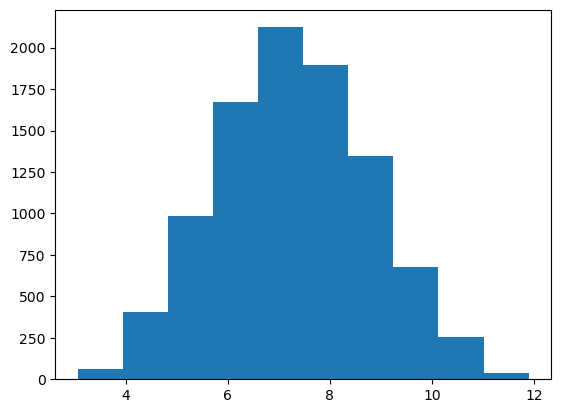

([60.0, 407.0, 984.0, 1672.0, 2123.0, 1897.0, 1347.0, 679.0, 256.0, 36.0], [3.0595289999619126, 3.9432094999589027, 4.826889999955893, 5.710570499952882, 6.594250999949873, 7.4779314999468625, 8.361611999943852, 9.245292499940842, 10.128972999937833, 11.012653499934821, 11.896333999931812], (PyObject <matplotlib.patches.Rectangle object at 0x7fd5616b9e50>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5616b9cd0>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632cd370>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632cd640>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632cd910>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632cdbe0>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632cdeb0>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632dd1c0>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632dd490>, PyObject <matplotlib.patches.Rectangle object at 0x7fd5632dd760>))

In [141]:
using PyPlot
hist(data_2)

In [95]:
starts = [3, 5, 9, 40]
length_read = 3
data=[]
for l in IslandIterator(starts,length_read)
    push!(data,l)
end

In [97]:
data==[(2, 5), (1, 3), (1, 3)]

true

In [36]:
for i in IslandIterator(starts, length_read)
    print(i)
end

(2, 5.0)(1, 3.0)(2, 4.0)

In [38]:
#collect(IslandIterator(starts, length_read))

In [40]:
#collect(1:5)